# <font color = 'magenta'><b>FIFA world cup Analysis</b></font>

---

### <font color = 'yellow'><b>Importing requied libraries</b></font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <font color = 'yellow'><b>Loading the dataset</b></font>

In [2]:
matchs = pd.read_csv('FIFA WC data/WorldCupMatches.csv')
players = pd.read_csv('FIFA WC data/WorldCupPlayers.csv')
cups = pd.read_csv('FIFA WC data/WorldCups.csv')

In [3]:
matchs.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
matchs.tail()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [6]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


### <font color = 'yellow'><b>Data Preprocessing</b></font>

In [7]:
matchs.shape

(4572, 20)

In [8]:
matchs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [9]:
matchs.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [10]:
# there are too much missing values in each of the column so we will drop the rows with missing values
matchs.dropna(inplace=True)
matchs

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


### <font color = 'yellow'><b>Players dataset</b></font>

In [11]:
players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [12]:
players.shape

(37784, 9)

In [13]:
# there are about more than 90% missing values in players dataset so we will drop the columns with missing values
players.drop(['Position', 'Event'], axis=1)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI
...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI


In [14]:
cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

# **Preprocessing Data**

In [15]:
matchs['Home Team Name'].value_counts()[60:]

Home Team Name
Iraq                          2
Serbia                        1
New Zealand                   1
IR Iran                       1
Iran                          1
Ukraine                       1
Canada                        1
Angola                        1
rn">Serbia and Montenegro     1
rn">Trinidad and Tobago       1
China PR                      1
Jamaica                       1
Bolivia                       1
Wales                         1
Norway                        1
rn">United Arab Emirates      1
Haiti                         1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [16]:
names = matchs[matchs['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [17]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [18]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [19]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [20]:
wrong = wrong + old_name
correct = correct + new_name

In [21]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [22]:
# Filling the wrong values with correct values
for index, wr in enumerate(wrong):
    cups = cups.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matchs = matchs.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [23]:
matchs.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [24]:
win = []
for i in matchs.values:
  if i[6] > i[7]:
    win.append(i[5])
  else:
    win.append(i[8])

In [25]:
win

['France',
 'USA',
 'Yugoslavia',
 'Romania',
 'Argentina',
 'Chile',
 'Yugoslavia',
 'USA',
 'Uruguay',
 'Chile',
 'Argentina',
 'Brazil',
 'Paraguay',
 'Uruguay',
 'Argentina',
 'Argentina',
 'Uruguay',
 'Uruguay',
 'Austria',
 'Hungary',
 'Switzerland',
 'Sweden',
 'Germany',
 'Spain',
 'Italy',
 'Czechoslovakia',
 'Czechoslovakia',
 'Germany',
 'Spain',
 'Austria',
 'Italy',
 'Italy',
 'Czechoslovakia',
 'Germany',
 'Italy',
 'Germany',
 'Hungary',
 'France',
 'Romania',
 'Italy',
 'Brazil',
 'Czechoslovakia',
 'Cuba',
 'Switzerland',
 'Czechoslovakia',
 'Hungary',
 'Sweden',
 'Italy',
 'Brazil',
 'Hungary',
 'Italy',
 'Brazil',
 'Italy',
 'Brazil',
 'England',
 'Spain',
 'Sweden',
 'Yugoslavia',
 'Switzerland',
 'Yugoslavia',
 'Spain',
 'Paraguay',
 'USA',
 'Brazil',
 'Spain',
 'Italy',
 'Uruguay',
 'Switzerland',
 'Chile',
 'Spain',
 'Brazil',
 'Brazil',
 'Uruguay',
 'Sweden',
 'Uruguay',
 'Uruguay',
 'Austria',
 'Brazil',
 'Yugoslavia',
 'Germany',
 'Hungary',
 'Belgium',
 'Swit

In [26]:
matchs['winning_Team'] = win

In [27]:
matchs.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'winning_Team'],
      dtype='object')

## <font color = 'yellow'><b>Most Number of World Cup Winning Team</b></font>

In [28]:
d = cups['Winner'].value_counts()
df = pd.DataFrame(d, index=d.index).reset_index().rename(columns={'Winner': 'Country', 'count': 'No. of Wins'})
df

,Country,No. of Wins
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2
5,England,1
6,France,1
7,Spain,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Italy'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Uruguay'),
  Text(4, 0, 'Argentina'),
  Text(5, 0, 'England'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Spain')])

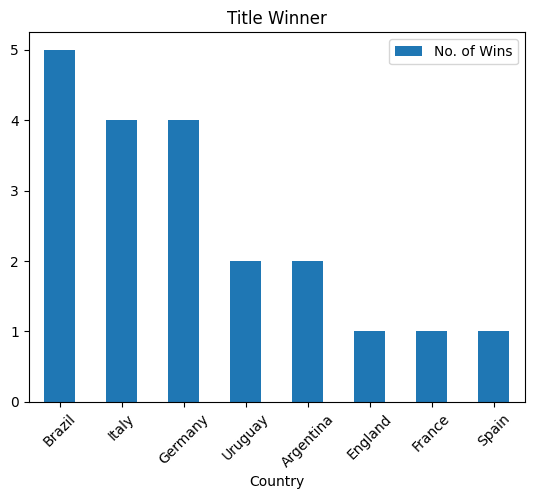

In [29]:
df.plot(kind = 'bar', x = 'Country', y = 'No. of Wins', xlabel='Country', title = 'Title Winner')
plt.xticks(rotation=45)

Brazil has won more number of world cups than any other country

## <font color = 'yellow'><b>Most Number of Runnner Team</b></font>

In [30]:
d = cups['Runners-Up'].value_counts()
df = pd.DataFrame(d).reset_index().rename(columns={'Runners-Up': 'Country', 'count': 'No. of Runner-Ups'})
df

,Country,No. of Runner-Ups
0,Germany,4
1,Argentina,3
2,Netherlands,3
3,Czechoslovakia,2
4,Hungary,2
5,Brazil,2
6,Italy,2
7,Sweden,1
8,France,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Czechoslovakia'),
  Text(4, 0, 'Hungary'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'France')])

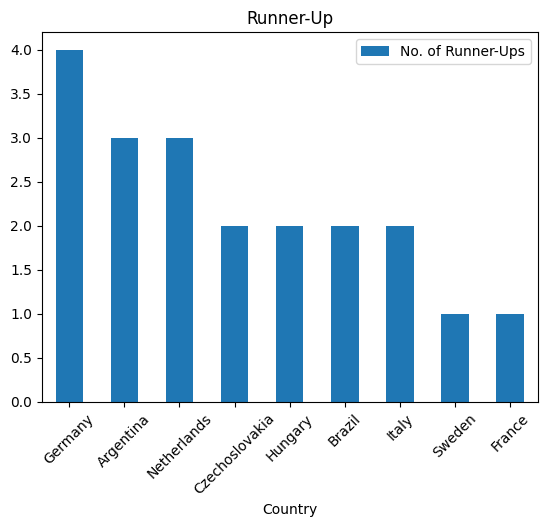

In [31]:
df.plot(kind = 'bar', x = 'Country', y = 'No. of Runner-Ups', xlabel='Country', title = 'Runner-Up')
plt.xticks(rotation=45)

### Germany has won more number of runner title, it became runner 4 times

## <font color = 'yellow'><b>Most Number of third place Team</b></font>

In [32]:
d = cups['Third'].value_counts()
df = pd.DataFrame(d).reset_index().rename(columns={'Third': 'Country', 'count': 'No. of Third Place'})
df

,Country,No. of Third Place
0,Germany,4
1,Brazil,2
2,Sweden,2
3,France,2
4,Poland,2
5,USA,1
6,Austria,1
7,Chile,1
8,Portugal,1
9,Italy,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Sweden'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'USA'),
  Text(6, 0, 'Austria'),
  Text(7, 0, 'Chile'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Croatia'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'Netherlands')])

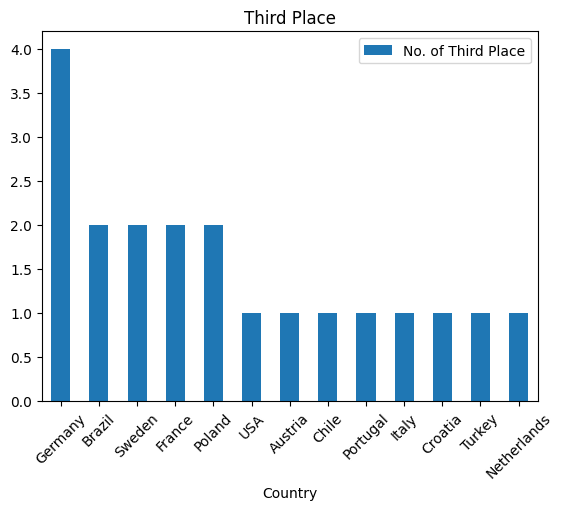

In [33]:
df.plot(kind = 'bar', x = 'Country', y = 'No. of Third Place', xlabel='Country', title = 'Third Place')
plt.xticks(rotation=45)

### *Note : Germany has became Third place 4 times*

## <font color = 'yellow'><b>Total no of goals by each team</b></font>

In [34]:
df = pd.DataFrame(cups.groupby('Country').sum()['GoalsScored'])
df.sort_values(by = 'GoalsScored',ascending = False)

,GoalsScored
Country,
Brazil,259
France,255
Germany,244
Mexico,227
Italy,185
Korea/Japan,161
Spain,146
South Africa,145
USA,141


<Axes: title={'center': 'Total Number of goals'}, xlabel='Country'>

<Figure size 1200x600 with 0 Axes>

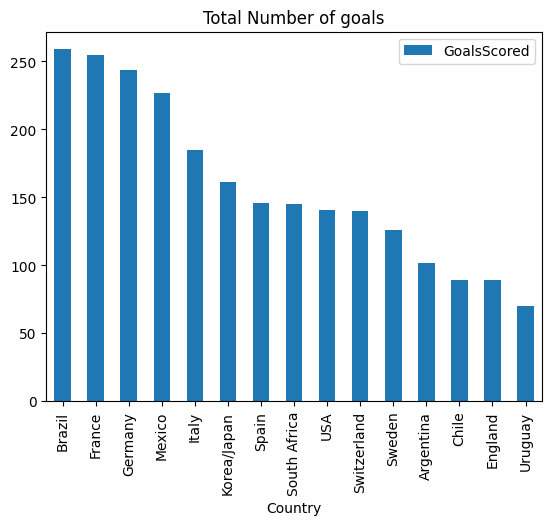

In [35]:
v = df.sort_values(by = 'GoalsScored',ascending = False)
plt.figure(figsize=(12, 6))
v.plot(kind = 'bar',title = 'Total Number of goals',)
# plt.xticks(rotation=45)

### Note : Brazil has scored 259 goals in Overall, which is the highest

In [36]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


### <font color = 'yellow'><b>No of Teams Qualified per year</b></font>

C:\Users\khans\AppData\Local\Temp\ipykernel_10972\1282700128.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var.set_xticklabels(var.get_xticklabels(), rotation = 80)


Text(0.5, 1.0, 'Qualified Teams Per Year')

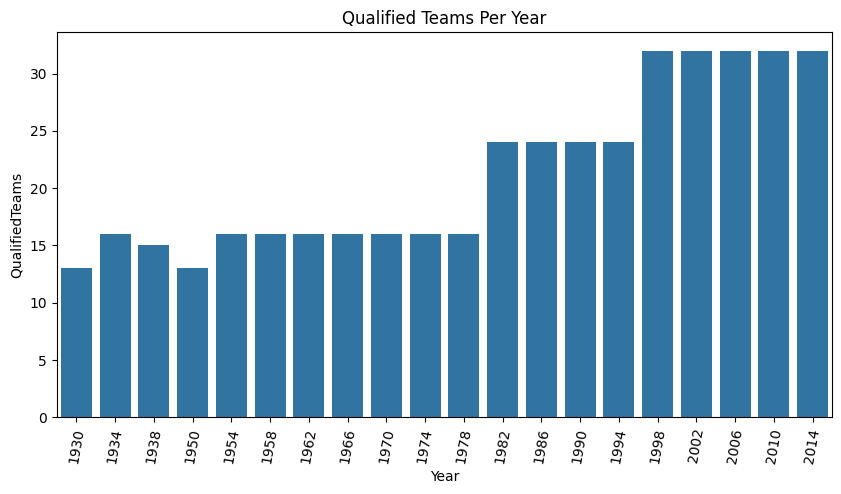

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
var = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = cups)
var.set_xticklabels(var.get_xticklabels(), rotation = 80)
var.set_title('Qualified Teams Per Year')

### Note : In 2002, 2006, 2010, 2014 more teams are qualified.
### Count : 32

## <font color = 'yellow'><b>No of Matches played per year</b></font>

C:\Users\khans\AppData\Local\Temp\ipykernel_10972\3766866960.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var.set_xticklabels(var.get_xticklabels(), rotation = 80)


Text(0.5, 1.0, 'Match Played Per Year')

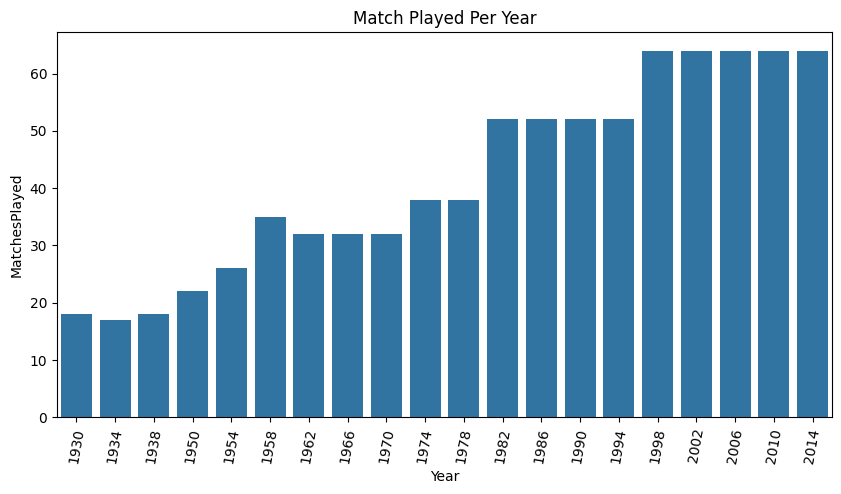

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
var = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = cups)
var.set_xticklabels(var.get_xticklabels(), rotation = 80)
var.set_title('Match Played Per Year')

### *Note : In 2002, 2006, 2010, 2014 more matches were played.*
### *Count : 64*

## <font color = 'yellow'><b>Top 10 Stadiums with most no of matches played</b></font>

In [39]:
pr = pd.DataFrame(matchs.groupby('Stadium')['Stadium'].count()).rename(columns = {'Stadium':'no of matches'})
pr = pr.sort_values(by ='no of matches', ascending = False)
pr.head(10)

,no of matches
Stadium,
Estadio Azteca,19
Maracan Stadium,18
Olympiastadion,14
Jalisco,14
Nou Camp - Estadio Le�n,11
Estadio Nacional,10
Nacional,10
Estadio Centenario,10
Stade V�lodrome,9


<Axes: xlabel='Stadium'>

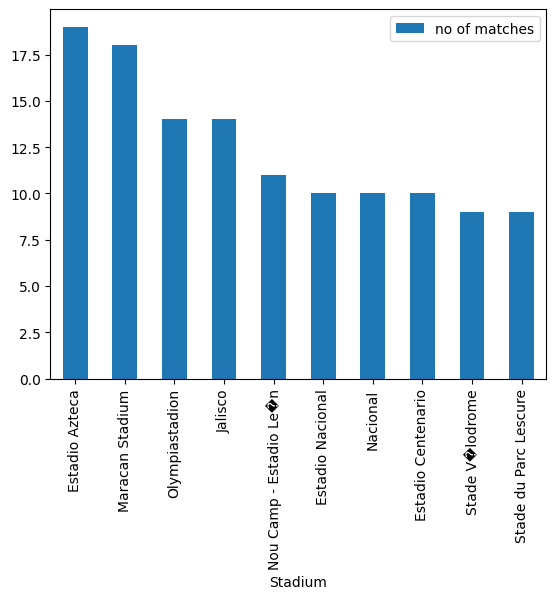

In [40]:
pr[:10].plot(kind = 'bar')

### *Note : Most of the macthes played in Estadio Azteca Stadium*


## <font color = 'yellow'><b>Top 10 Teams with most no of Goals in their Home</b></font>

In [41]:
df1 = pd.DataFrame(matchs.groupby( 'Home Team Name')['Home Team Goals'].sum())
df1 = df1.sort_values(by = 'Home Team Goals', ascending = False).head(10)
df1

,Home Team Goals
Home Team Name,
Brazil,180.0
Germany,164.0
Argentina,111.0
Italy,99.0
Hungary,73.0
France,68.0
Uruguay,62.0
England,54.0
Sweden,53.0


<Axes: xlabel='Home Team Name'>

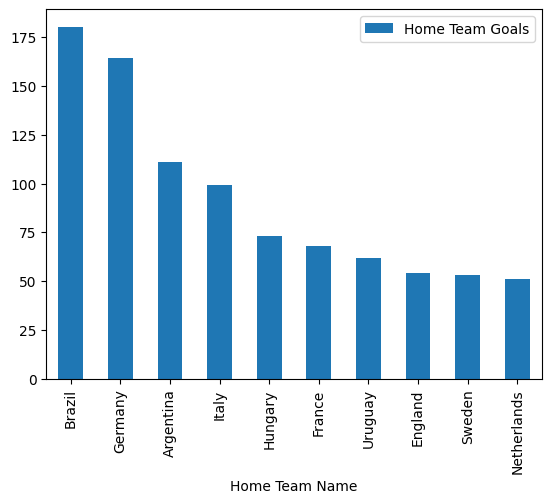

In [42]:
df1.plot(kind = 'bar')

### *Note : Brazil has scored most no of Goals in their Home,it scored 180 goals*

## <font color = 'yellow'><b>Top 10 Teams with most no of Goals as a Away Team</b></font>

In [43]:
df2 = pd.DataFrame(matchs.groupby( 'Away Team Name')['Away Team Goals'].sum())
df2 = df2.sort_values(by = 'Away Team Goals', ascending = False).head(10)
df2

,Away Team Goals
Away Team Name,
Germany,67.0
Brazil,45.0
Spain,42.0
France,40.0
Netherlands,40.0
Mexico,36.0
Italy,29.0
Belgium,27.0
England,25.0


<Axes: xlabel='Away Team Name'>

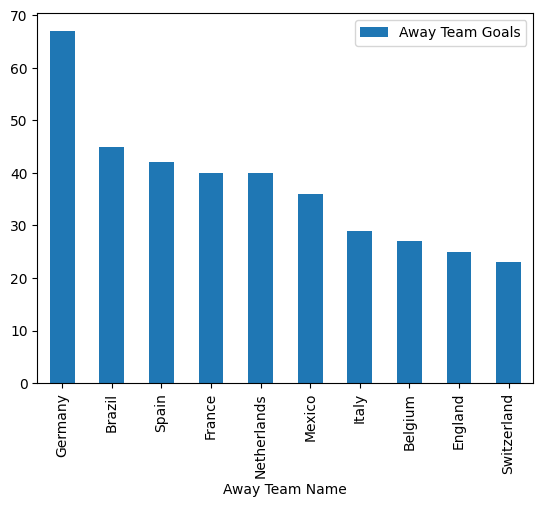

In [44]:
df2.plot(kind = 'bar')

### *Note : Germany has scored most no of Goals as a Away Team,it scored 67 goals*

## <font color = 'yellow'><b>Top 10 Teams with maximum win count</b></font>

In [45]:
df3 = pd.DataFrame(matchs.groupby(['Year','winning_Team'])['winning_Team'].count()).rename(columns = {'winning_Team': 'win_count'})
df3 = df3.reset_index()

In [46]:
df3 = pd.DataFrame(df3.groupby('winning_Team')['win_count'].sum()).sort_values(by = 'win_count',ascending = False)
df3 = df3.head(10)
df3

,win_count
winning_Team,
Brazil,75
Germany,70
Argentina,54
Italy,52
France,35
England,35
Spain,34
Netherlands,33
Uruguay,25


<Axes: xlabel='winning_Team'>

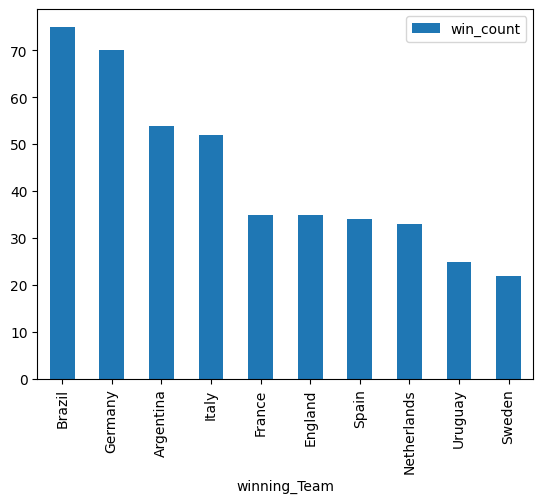

In [47]:
df3.plot(kind = 'bar')

### *Note : brazil has won most no of matches in FIFA worldcup series,it has won 75 matches*

## <font color = 'yellow'><b>Top 10 teams with most no of goals in Half-Time</b></font>

In [48]:
pr_1 = pd.DataFrame(matchs.groupby('Home Team Name')['Half-time Home Goals'].sum()).sort_values(by = 'Half-time Home Goals', ascending = False).reset_index()
pr_1 = pr_1.rename(columns ={'Home Team Name' : 'team_name'})


In [49]:
pr_2 = pd.DataFrame(matchs.groupby('Away Team Name')['Half-time Away Goals'].sum()).sort_values(by = 'Half-time Away Goals', ascending = False).reset_index()
pr_2 = pr_2.rename(columns ={'Away Team Name' : 'team_name'})


In [50]:
pr_3 = pd.merge(pr_1, pr_2, on='team_name', how='outer')
pr_3['Tot_half-Time_Goals'] = pr_3['Half-time Home Goals'] + pr_3['Half-time Away Goals']
pr_3 = pr_3.head(10)
pr_3

,team_name,Half-time Home Goals,Half-time Away Goals,Tot_half-Time_Goals
0,Algeria,3.0,4.0,7.0
1,Angola,0.0,0.0,0.0
2,Argentina,48.0,8.0,56.0
3,Australia,1.0,3.0,4.0
4,Austria,14.0,3.0,17.0
5,Belgium,10.0,8.0,18.0
6,Bolivia,0.0,0.0,0.0
7,Bosnia and Herzegovina,1.0,0.0,1.0
8,Brazil,66.0,17.0,83.0
9,Bulgaria,3.0,4.0,7.0


<Axes: title={'center': 'teams with most no of goals in Half-Time'}, xlabel='team_name'>

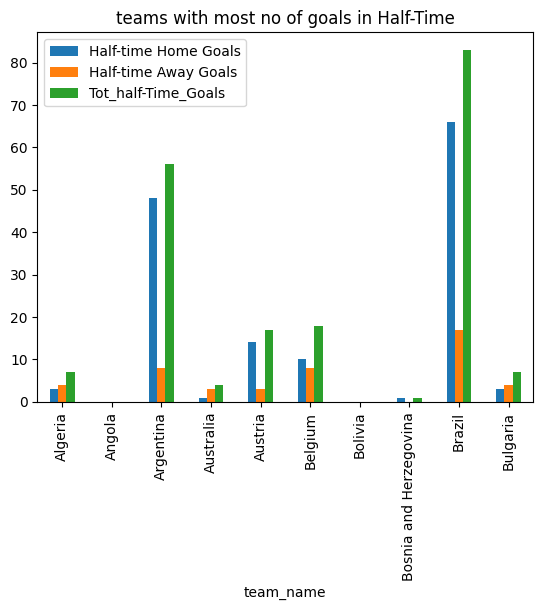

In [51]:
pr_3.plot(kind = 'bar',xlabel = 'team_name',x = 'team_name', title = 'teams with most no of goals in Half-Time' )

### 1. Germany and Brazil has scored more goals in Half-Time in their home ground

### 2. Germany has scored more goals in Half-Time as a Away Team

### 3. Germany has scored more goals in Half-Time, it has scored 96 goals

---